<>:117: SyntaxWarning: invalid escape sequence '\c'
<>:117: SyntaxWarning: invalid escape sequence '\c'
C:\Users\26921\AppData\Local\Temp\ipykernel_28228\132970920.py:117: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(coordinates[:, 0], coordinates[:, 1], 'r.', marker=u'$\cdot$')


iter(迭代次数): 0
iter(迭代次数): 30
iter(迭代次数): 60
iter(迭代次数): 90
iter(迭代次数): 120
iter(迭代次数): 150
iter(迭代次数): 180


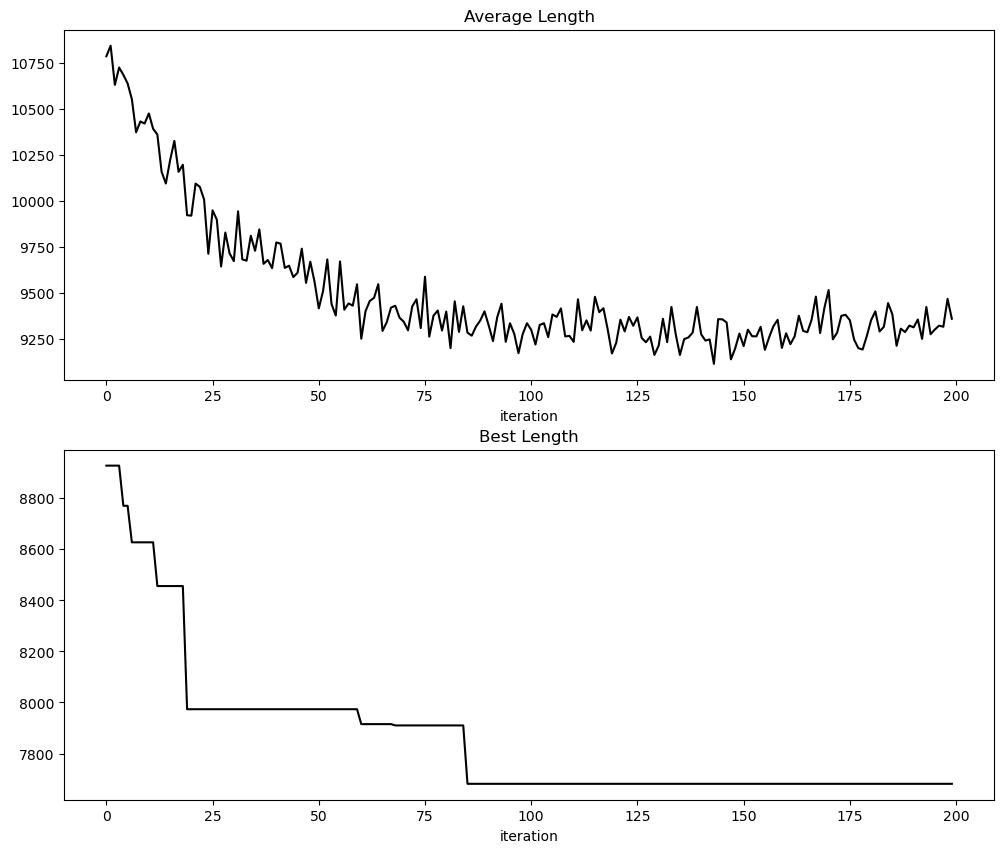

C:\Users\26921\AppData\Local\Temp\ipykernel_28228\132970920.py:117: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(coordinates[:, 0], coordinates[:, 1], 'r.', marker=u'$\cdot$')


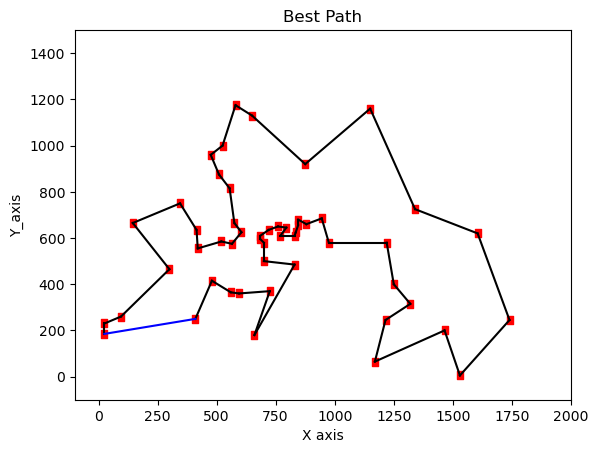

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 城市坐标(52个城市)
coordinates = np.array([[565.0,575.0],[25.0,185.0],[345.0,750.0],[945.0,685.0],[845.0,655.0],
            [880.0,660.0],[25.0,230.0],[525.0,1000.0],[580.0,1175.0],[650.0,1130.0],
            [1605.0,620.0],[1220.0,580.0],[1465.0,200.0],[1530.0,  5.0],[845.0,680.0],
            [725.0,370.0],[145.0,665.0],[415.0,635.0],[510.0,875.0],[560.0,365.0],
            [300.0,465.0],[520.0,585.0],[480.0,415.0],[835.0,625.0],[975.0,580.0],
            [1215.0,245.0],[1320.0,315.0],[1250.0,400.0],[660.0,180.0],[410.0,250.0],
            [420.0,555.0],[575.0,665.0],[1150.0,1160.0],[700.0,580.0],[685.0,595.0],
            [685.0,610.0],[770.0,610.0],[795.0,645.0],[720.0,635.0],[760.0,650.0],
            [475.0,960.0],[95.0,260.0],[875.0,920.0],[700.0,500.0],[555.0,815.0],
            [830.0,485.0],[1170.0, 65.0],[830.0,610.0],[605.0,625.0],[595.0,360.0],
            [1340.0,725.0],[1740.0,245.0]])

def getdistmat(coordinates):
    num = coordinates.shape[0]
    distmat = np.zeros((52, 52))
    for i in range(num):
        for j in range(i, num):
            distmat[i][j] = distmat[j][i] = np.linalg.norm(
                coordinates[i] - coordinates[j])
    return distmat


# #//初始化
distmat = getdistmat(coordinates)
numant = 45 ##// 蚂蚁个数
numcity = coordinates.shape[0] ##// 城市个数
alpha = 1 ##// 信息素重要程度因子
beta = 5 ##// 启发函数重要程度因子
rho = 0.1 ##// 信息素的挥发速度
Q = 1 ##//信息素释放总量
iter = 0##//循环次数
itermax = 200#//循环最大值
etatable = 1.0 / (distmat + np.diag([1e10] * numcity)) #// 启发函数矩阵，表示蚂蚁从城市i转移到矩阵j的期望程度
pheromonetable = np.ones((numcity, numcity)) #// 信息素矩阵
pathtable = np.zeros((numant, numcity)).astype(int) #// 路径记录表
distmat = getdistmat(coordinates) #// 城市的距离矩阵
lengthaver = np.zeros(itermax) #// 各代路径的平均长度
lengthbest = np.zeros(itermax) #// 各代及其之前遇到的最佳路径长度
pathbest = np.zeros((itermax, numcity)) #// 各代及其之前遇到的最佳路径长度
#//核心点-循环迭代
while iter < itermax:
    #// 随机产生各个蚂蚁的起点城市
    if numant <= numcity:
        #// 城市数比蚂蚁数多
        pathtable[:, 0] = np.random.permutation(range(0, numcity))[:numant]
    else:
        #// 蚂蚁数比城市数多，需要补足
        pathtable[:numcity, 0] = np.random.permutation(range(0, numcity))[:]
        pathtable[numcity:, 0] = np.random.permutation(range(0, numcity))[
            :numant - numcity]
    length = np.zeros(numant)  # 计算各个蚂蚁的路径距离
    for i in range(numant):
        visiting = pathtable[i, 0]  # 当前所在的城市
        unvisited = set(range(numcity))  # 未访问的城市,以集合的形式存储{}
        unvisited.remove(visiting)  # 删除元素；利用集合的remove方法删除存储的数据内容
        for j in range(1, numcity):  # 循环numcity-1次，访问剩余的numcity-1个城市
            # 每次用轮盘法选择下一个要访问的城市
            listunvisited = list(unvisited)
            probtrans = np.zeros(len(listunvisited))
            for k in range(len(listunvisited)):
                probtrans[k] = np.power(pheromonetable[visiting][listunvisited[k]], alpha) \
                    * np.power(etatable[visiting][listunvisited[k]], beta)
            cumsumprobtrans = (probtrans / sum(probtrans)).cumsum()
            cumsumprobtrans -= np.random.rand()
            k = listunvisited[(np.where(cumsumprobtrans > 0)[0])[0]]
            # 元素的提取（也就是下一轮选的城市）
            pathtable[i, j] = k  # 添加到路径表中（也就是蚂蚁走过的路径)
            unvisited.remove(k)  # 然后在为访问城市set中remove（）删除掉该城市
            length[i] += distmat[visiting][k]
            visiting = k
        # 蚂蚁的路径距离包括最后一个城市和第一个城市的距离
        length[i] += distmat[visiting][pathtable[i, 0]]
        # 包含所有蚂蚁的一个迭代结束后，统计本次迭代的若干统计参数
    lengthaver[iter] = length.mean()
    if iter == 0:
        lengthbest[iter] = length.min()
        pathbest[iter] = pathtable[length.argmin()].copy()
    else:
        if length.min() > lengthbest[iter - 1]:
            lengthbest[iter] = lengthbest[iter - 1]
            pathbest[iter] = pathbest[iter - 1].copy()
        else:
            lengthbest[iter] = length.min()
            pathbest[iter] = pathtable[length.argmin()].copy()
    # 更新信息素
    changepheromonetable = np.zeros((numcity, numcity))
    for i in range(numant):
        for j in range(numcity - 1):
            changepheromonetable[pathtable[i, j]][pathtable[i, j + 1]] += Q / distmat[pathtable[i, j]][
                pathtable[i, j + 1]]  # 计算信息素增量
        changepheromonetable[pathtable[i, j + 1]][pathtable[i, 0]] += Q / distmat[pathtable[i, j + 1]][pathtable[i, 0]]
    pheromonetable = (1 - rho) * pheromonetable + \
        changepheromonetable  # 计算信息素公式
    if iter%30==0:
        print("iter(迭代次数):", iter)
    iter += 1  # 迭代次数指示器+1

# 做出平均路径长度和最优路径长度
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
axes[0].plot(lengthaver, 'k', marker=u'')
axes[0].set_title('Average Length')
axes[0].set_xlabel(u'iteration')

axes[1].plot(lengthbest, 'k', marker=u'')
axes[1].set_title('Best Length')
axes[1].set_xlabel(u'iteration')
fig.savefig('average_best.png', dpi=500, bbox_inches='tight')
plt.show()

# 作出找到的最优路径图
bestpath = pathbest[-1]
plt.plot(coordinates[:, 0], coordinates[:, 1], 'r.', marker=u'$\cdot$')
plt.xlim([-100, 2000])
plt.ylim([-100, 1500])

for i in range(numcity - 1):
    m = int(bestpath[i])
    n = int(bestpath[i + 1])
    plt.plot([coordinates[m][0], coordinates[n][0]], [
             coordinates[m][1], coordinates[n][1]], 'k')
plt.plot([coordinates[int(bestpath[0])][0], coordinates[int(n)][0]],
         [coordinates[int(bestpath[0])][1], coordinates[int(n)][1]], 'b')
ax = plt.gca()
ax.set_title("Best Path")
ax.set_xlabel('X axis')
ax.set_ylabel('Y_axis')

plt.savefig('best path.png', dpi=500, bbox_inches='tight')
plt.show()

